In [2]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import sys
sys.path.insert(0, '../')
from libra import trappist1_all_transits

In [66]:
from astropy.io import fits
from scipy.signal import medfilt

In [81]:
f = fits.getdata('/Users/bmmorris/Downloads/nPLDTrappisth2.sc.fits')

time, flux = f['TIME'], f['FLUX']
mask = time != 0
time += 2454833

time = time[mask]
flux = flux[mask] / np.median(flux[mask])

model = trappist1_all_transits(time)[:, 0]
flux /= model

p = np.polyfit(time, flux, 2)
flux -= np.polyval(p, time)

/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


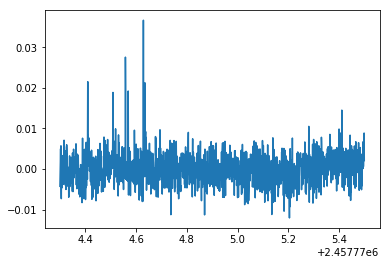

In [83]:
plt.plot(time, flux)

In [84]:
from interpacf import interpolated_acf

(-0.002, 0.005)

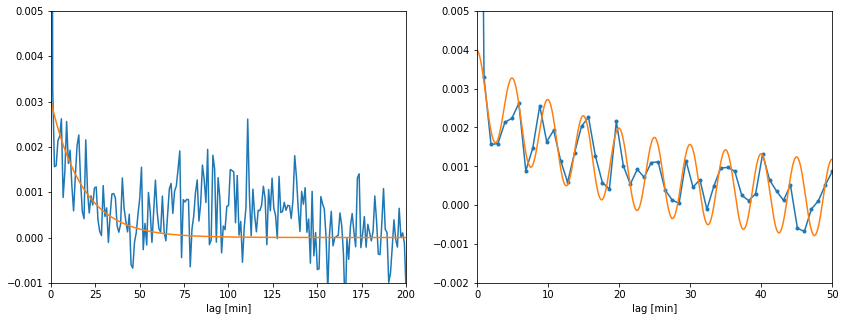

In [152]:
lag, acf = interpolated_acf(time, flux)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

c = 80


ax[0].plot(lag * 24 * 60, acf)
ax[0].plot(x * 24 * 60, 0.003 * np.exp(-c * x))# + 0.001 * np.cos(2*np.pi/period * x))
ax[0].set_xlabel('lag [min]')
ax[0].set_xlim([0, 200])
ax[0].set_ylim([-0.001, 0.005])
ax[1].plot(lag * 24 * 60, acf, '.-')

period = 5/60/24

x = np.linspace(lag.min(), lag.max(), 10000)

ax[1].plot(x * 24 * 60, 0.003 * np.exp(-c * x)+ 0.001 * np.cos(2*np.pi/period * x))

ax[1].set_xlabel('lag [min]')
ax[1].set_xlim([0, 50])
ax[1].set_ylim([-0.002, 0.005])